In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def scatterplot_custom(df: pd.DataFrame, 
                    path_to_save: str,
                    event_names: list[str] = ['First', 'Second'],
                    xlim: tuple[float, float] = (-0.05, 1.35),
                    ylim : tuple[float, float] = (-0.05, 1.35),
                    small_fontsize: int = 14, 
                    medium_fontsize: int = 18,
                    large_fontsize: int = 20,
                    measure_name: str = ""):
    values1 = df[event_names[0]].values
    values2 = df[event_names[1]].values

    # make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
    # and the color is determined by the test name
    # make a list of markers
    markers = ["o", "+"]

    # set seaborn style
    sns.set_style("darkgrid")

    # # set latex font
    plt.rcParams["mathtext.fontset"] = "stix"
    plt.rcParams["font.family"] = "STIXGeneral"

    # increase font size
    plt.rc('font', size=small_fontsize)          # controls default text sizes
    plt.rc('axes', titlesize=medium_fontsize)     # fontsize of the axes title
    plt.rc('axes', labelsize=large_fontsize)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=small_fontsize)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=small_fontsize)    # fontsize of the tick labels
    plt.rc('legend', fontsize=medium_fontsize)    # legend fontsize
    plt.rc('figure', titlesize=large_fontsize)  # fontsize of the figure title
    plt.rcParams.update({"font.size": medium_fontsize})

    # get a color palette
    palette = sns.color_palette("colorblind", n_colors=len(df))

    fig, axs = plt.subplots(
        2,
        2,
        figsize=(7, 5),
        gridspec_kw={"height_ratios": [10, 1], "width_ratios": [1, 10]},
    )
    plt.tight_layout()

    sns.scatterplot(
        data=df,
        x=event_names[0],
        y=event_names[1],
        label="",
        marker=markers[0],
        s=50,
        alpha=0.6,
        color=palette[0],
        ax=axs[0, 1],
    )

    axs[1, 0].axis("off")

    sns.kdeplot(
        x=values1,
        bw_method=0.5,
        color='black',
        fill=True,
        linewidth=1,
        ax=axs[1, 1],
    )
    sns.rugplot(
        x=values1,
        height=0.22,
        color="black",
        alpha=0.2,
        linewidth=2,
        ax=axs[1, 1],
    )
    axs[1, 1].set_xlabel(f"{measure_name}, {event_names[0]}")
    axs[0, 1].set_xlim(*xlim)
    axs[1, 1].set_xlim(*xlim)
    axs[0, 1].set_xticklabels([])
    axs[1, 1].set_yticklabels([])
    axs[0, 1].set_yticklabels([])
    axs[0, 1].set_ylabel(None)
    axs[1, 1].set_ylabel(None)

    axs[0, 0].invert_xaxis()
    axs[1, 1].invert_yaxis()
    sns.kdeplot(
        y=values2,
        bw_method=0.5,
        color='black',
        fill=True,
        linewidth=1,
        ax=axs[0, 0],
    )
    sns.rugplot(
        y=values2,
        height=0.22,
        color="black",
        alpha=0.2,
        linewidth=2,
        ax=axs[0, 0],
    )
    axs[0, 0].set_ylabel(f"{measure_name}, {event_names[1]}")
    axs[0, 1].set_ylim(*ylim)
    axs[0, 0].set_ylim(*ylim)
    axs[0, 0].set_xlabel(None)
    axs[0, 0].set_xticklabels([])


    axs[0, 1].grid(False)
    # axs[0, 1].set_title("Average Dynamic Time Warping Distance")
    plt.subplots_adjust(wspace=0.04, hspace=0.04)

    for ax in axs:
        for ax2 in ax:
            ax2.set_anchor("W")
            
    axs[0,1].grid(True)
    plt.savefig(path_to_save, bbox_inches="tight")
    plt.show()
    



# DTW

## USILaughs

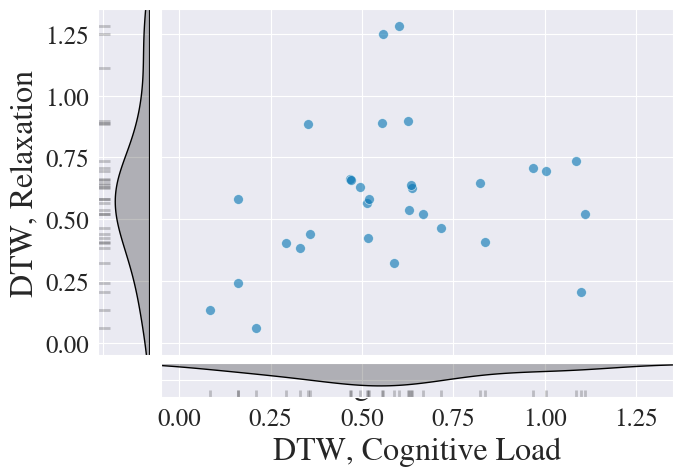

In [11]:
df = pd.read_csv("../test_results/dtw-usilaughs.csv", index_col=0)
# move the 1 column into two separate columns, called "Cognitive Load" and "Relaxation"
df = df.pivot(index="0", columns="1", values="2")
df.columns = ["Relaxation", "Cognitive Load"]

scatterplot_custom(
    df=df,
    event_names=["Cognitive Load", "Relaxation"],
    path_to_save="../final_visualizations/dtw-usilaughs.pdf",
    xlim=(-0.05, 1.35),
    ylim=(-0.05, 1.35),
    small_fontsize=18,
    medium_fontsize=23,
    large_fontsize=28,
    measure_name="DTW",
)


## MWC2022

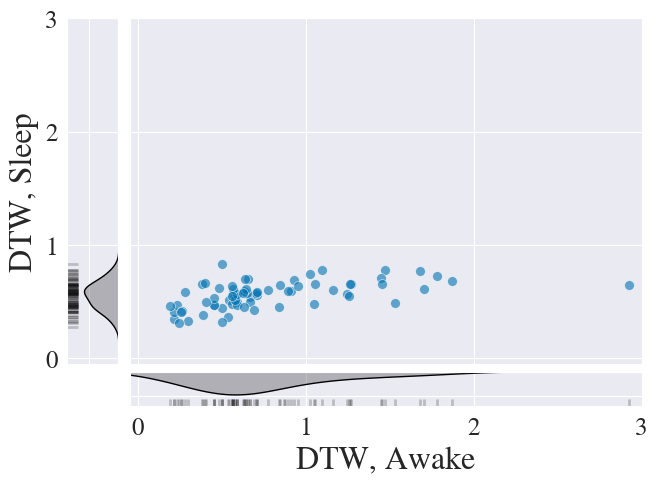

In [12]:
df = pd.read_csv("../test_results/dtw-mwc2022.csv", index_col=0)
# move the 1 column into two separate columns, called "Cognitive Load" and "Relaxation"
df = df.pivot(index=["0", "1"], columns="2", values="3")
df.rename(columns={'sleep': 'Sleep', 'wake1': 'Wake1', 'wake2': 'Wake2'}, inplace=True)
df['Awake'] = df['Wake1'] + df['Wake2'] / 2

scatterplot_custom(
    df=df,
    event_names=["Awake", "Sleep"],
    path_to_save="../final_visualizations/dtw-mwc2022.pdf",
    small_fontsize=18,
    xlim=(-0.05, 3),
    ylim=(-0.05, 3),
    medium_fontsize=23,
    large_fontsize=28,
    measure_name="DTW",
)


# DCCA

## USILaughs

In [3]:
baseline = [0.31, 0.13, 0.77, 0.074, 0.43, 0.92, 0.23, 0.2, 0.23, 0.12, 0.076, 0.088, 0.15, 0.1, 2.9e-06, 0.042, 0.086, 0.065, 0.25, 0.0022, 0.62, 0.27, 0.7, 0.045, 0.17, 0.059, 0.43, 0.017, 0.25, 0.55, 0.043, 0.0019]
cognitive_load = [0.0044, 0.75, 0.94, 0.0099, 0.0011, 0.93, 0.16, 0.049, 0.24, 0.0016, 0.14, 0.021, 0.065, 0.38, 0.66, 0.11, -0.0011, 0.28, 0.82, 0.59, 0.87, 0.018, 0.17, 0.21, 0.016, 0.017, 0.53,0.47, 0.21, 0.18, 0.1, 0.41]
# make dataframe with multi index columns. First level should be left/right, and second level test name
df = pd.DataFrame([baseline, cognitive_load]).T
# make the multi index from tuples, where first you have the side and then the test name
df.columns = ['Relaxation', 'Cognitive Load']
# sort by the first level of the multi index
# df = df.sort_index(axis=1)
df['Participant ID']= [
"s052","s043","s037","s038","s072","s075","s066","s053","s077","s045","s047","s074","s044","s048","s055","s098","s083","s089","s087","s099","s039","s042","s097","s081","s088","s073","s096","s065","s071","s059","s092","s049"
]

In [4]:
relax_count_high = ((df['Relaxation'] > 0.4).sum())/len(df)
cog_count_high = ((df['Cognitive Load'] > 0.4).sum())/len(df)
relax_avg_cor = df['Relaxation'].mean()
cog_avg_cor = df['Cognitive Load'].mean()

print(f'Percentage of relaxation correlation above 0.5: {relax_count_high}%')
print(f'Percentage of cognitive load correlation above 0.5: {cog_count_high}%')
print(f'Average correlation for relaxation: {relax_avg_cor}')
print(f'Average correlation for cognitive load: {cog_avg_cor}')

Percentage of relaxation correlation above 0.5: 0.21875%
Percentage of cognitive load correlation above 0.5: 0.3125%
Average correlation for relaxation: 0.232159465625
Average correlation for cognitive load: 0.292246875


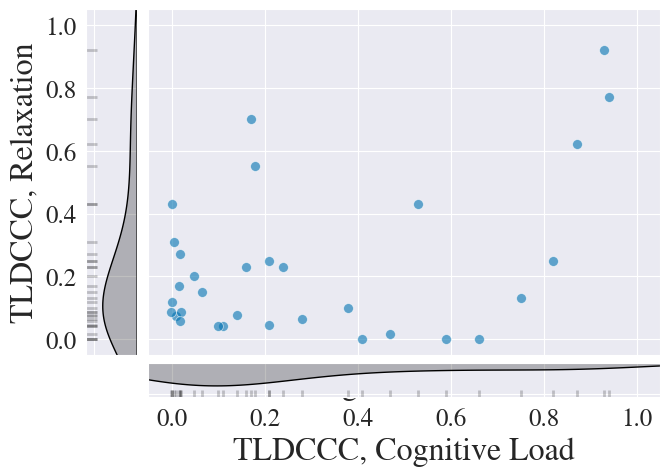

In [13]:
scatterplot_custom(
    df=df,
    event_names=["Cognitive Load", "Relaxation"],
    path_to_save="../final_visualizations/dcca-usilaughs.pdf",
    small_fontsize=18,
    xlim=(-0.05, 1.05),
    ylim=(-0.05, 1.05),
    medium_fontsize=23,
    large_fontsize=28,
    measure_name="TLDCCC",
)


## MWC2022

In [3]:
# load pickled dict
#
from pickle import load

with open("../test_results/max_dcca_w_events_mwc2022.pkl", "rb") as f:
    dcca: dict[str, dict[str, dict[str, float]]] = load(f)
    
sleep = [
    sleep_data
    for user_data in dcca.values()
    for session_data in user_data.values()
    for event_name, sleep_data in session_data.items() if event_name == "sleep"
]

wake1 = [
    wake1_data
    for user_data in dcca.values()
    for session_data in user_data.values()
    for event_name, wake1_data in session_data.items() if event_name == "wake1"
] 

wake2 = [
    wake2_data
    for user_data in dcca.values()
    for session_data in user_data.values()
    for event_name, wake2_data in session_data.items() if event_name == "wake2"
]

# make dataframe with multi index columns. First level should be left/right, and second level test name
df = pd.DataFrame([sleep, wake1]).T
# make the multi index from tuples, where first you have the side and then the test name
df.columns = ['Sleep', 'Awake']
# sort by the first level of the multi index
# df = df.sort_index(axis=1)

In [6]:
sleep_count_high = ((df['Sleep'] > 0.4).sum())/len(df)
awake_count_high = ((df['Awake'] > 0.4).sum())/len(df)
sleep_avg_cor = df['Sleep'].mean()
awake_avg_cor = df['Awake'].mean()

print(f'Percentage of Sleep correlation above 0.5: {sleep_count_high}%')
print(f'Percentage of Awake correlation above 0.5: {awake_count_high}%')
print(f'Average correlation for sleep: {sleep_avg_cor}')
print(f'Average correlation for awake: {awake_avg_cor}')

Percentage of Sleep correlation above 0.5: 0.44554455445544555%
Percentage of Awake correlation above 0.5: 0.04950495049504951%
Average correlation for sleep: 0.376515973621495
Average correlation for awake: 0.08070288449937917


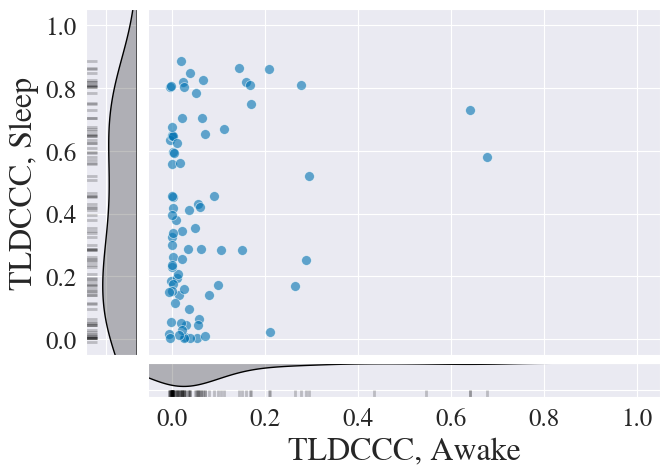

In [15]:
scatterplot_custom(
    df=df,
    event_names=["Awake", "Sleep"],
    path_to_save="../final_visualizations/dcca-mwc2022-sleepwake.pdf",
    small_fontsize=18,
    xlim=(-0.05, 1.05),
    ylim=(-0.05, 1.05),
    medium_fontsize=23,
    large_fontsize=28,
    measure_name="TLDCCC",
)